# Импорт библиотек

In [76]:
from stocks_parser import StockParser
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Исходные данные

In [77]:
stock_parser = StockParser(['SBER'], start_date = '2020-01-01', end_date = '2024-01-01')
stock_parser.parse_stocks()
# stock_parser.plot_stock_data()
stock_data = stock_parser.get_stocks_dataframe()

In [78]:
stock_data=stock_data['SBER']
stock_data_no_dublicates = stock_data.drop_duplicates(subset='date', keep='last')
stock_data = stock_data.sort_values('date')

In [79]:
stock_data = stock_data.reset_index()

stock_data['increments'] = stock_data['close'].diff()
stock_data

,index,ticker,per,date,time,open,high,low,close,vol,increments
0,0,SBER,D,2020-01-03,0,255.97,258.19,253.70,255.00,35824160,NaN
1,1,SBER,D,2020-01-06,0,254.75,254.84,251.40,253.90,22327940,-1.10
2,2,SBER,D,2020-01-08,0,253.62,259.15,253.03,259.15,40736030,5.25
3,3,SBER,D,2020-01-09,0,259.41,261.76,257.01,257.99,38196300,-1.16
4,4,SBER,D,2020-01-10,0,257.91,259.25,256.88,258.19,18841650,0.20
...,...,...,...,...,...,...,...,...,...,...,...
988,988,SBER,D,2023-12-25,0,271.75,273.85,270.05,271.08,37827910,-0.22
989,989,SBER,D,2023-12-26,0,271.00,272.89,270.00,271.90,22575240,0.82
990,990,SBER,D,2023-12-27,0,271.90,272.59,270.85,271.08,17191450,-0.82
991,991,SBER,D,2023-12-28,0,270.99,272.48,268.52,271.74,29416450,0.66


 # Проверка на нормальность исходной выборки

p-value for the normal test: 3.4481893506622873e-186
Приращения не являются нормально распределенными.


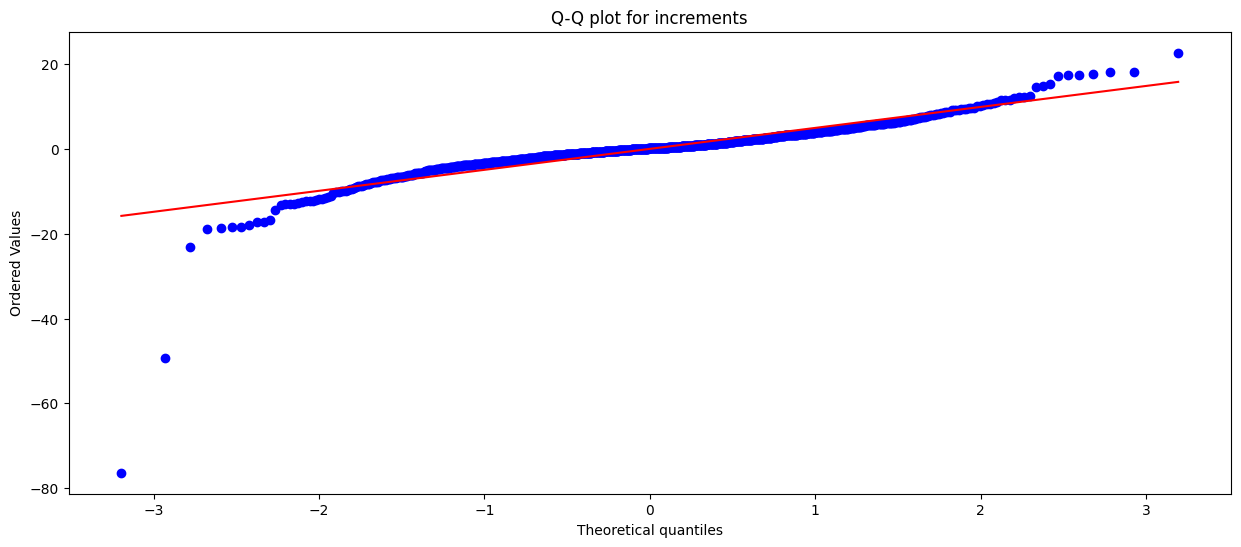

In [80]:
stock_data = stock_data.dropna()

statistic, p_value = stats.normaltest(stock_data['increments'])
print(f"p-value for the normal test: {p_value}")

if p_value > 0.05:
    print("Приращения нормально распределены.")
else:
    print("Приращения не являются нормально распределенными.")

plt.subplots(figsize=(15, 6))

stats.probplot(stock_data['increments'], dist="norm", plot=plt)
plt.title("Q-Q plot for increments")
plt.show()

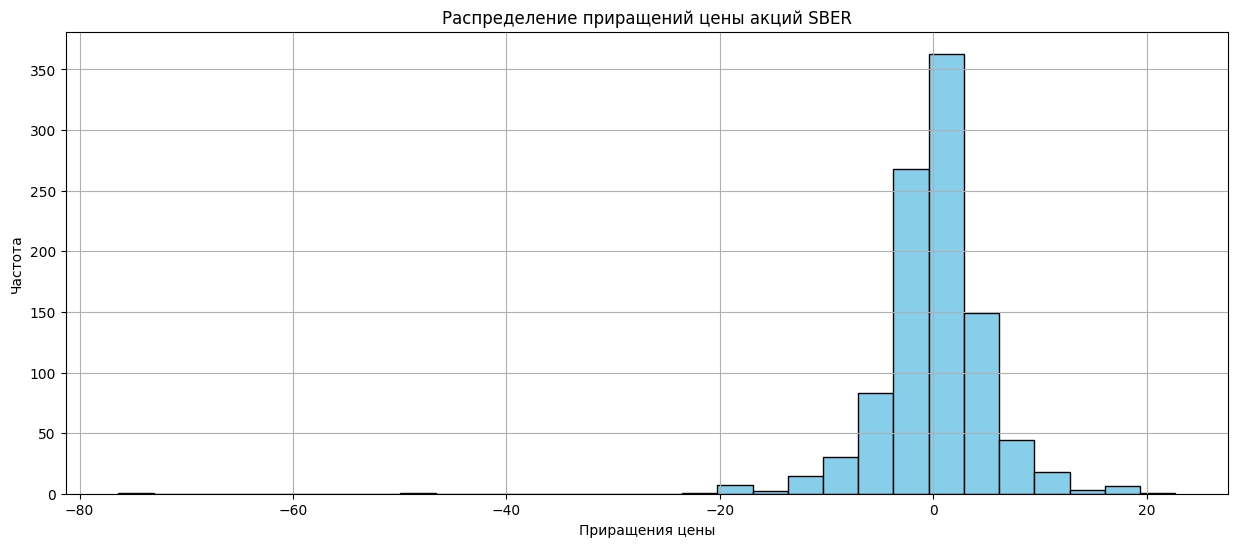

In [81]:
plt.subplots(figsize=(15, 6))
plt.hist(stock_data['increments'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение приращений цены акций SBER')
plt.xlabel('Приращения цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

# Нормальность после удаления выбросов

p-value for the normal test after outlier removal: 0.7069811128657937
Приращения нормально распределены после удаления выбросов.


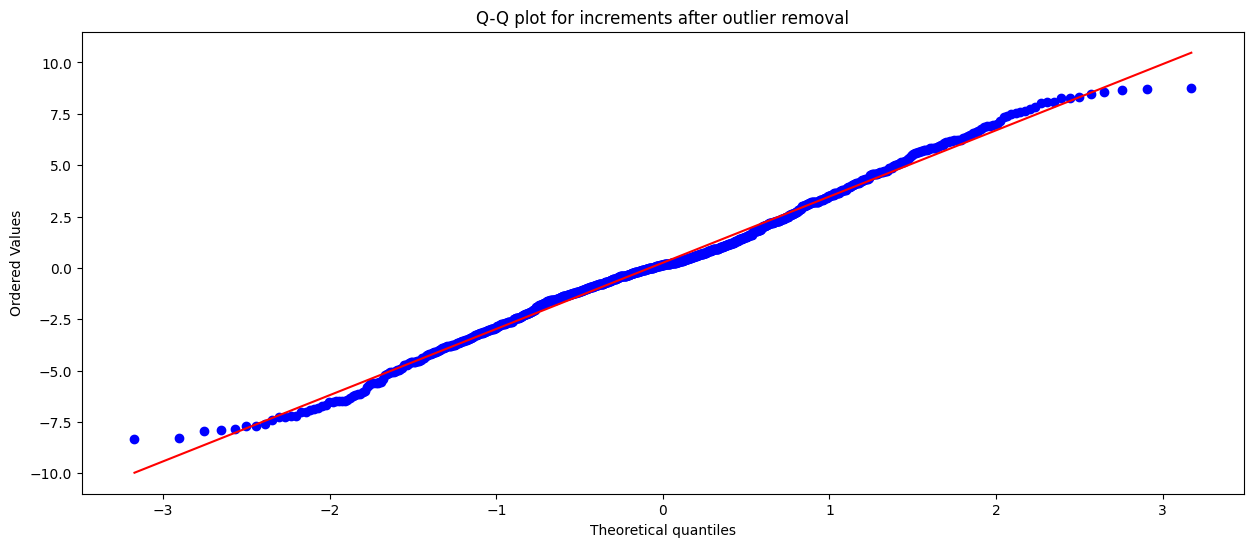

In [82]:

Q1 = stock_data['increments'].quantile(0.25)
Q3 = stock_data['increments'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


filtered_data = stock_data[(stock_data['increments'] >= lower_bound) & (stock_data['increments'] <= upper_bound)]


statistic, p_value = stats.normaltest(filtered_data['increments'])
print(f"p-value for the normal test after outlier removal: {p_value}")


if p_value > 0.05:
    print("Приращения нормально распределены после удаления выбросов.")
else:
    print("Приращения не являются нормально распределенными после удаления выбросов.")

plt.subplots(figsize=(15, 6))
stats.probplot(filtered_data['increments'], dist="norm", plot=plt)
plt.title("Q-Q plot for increments after outlier removal")
plt.show()

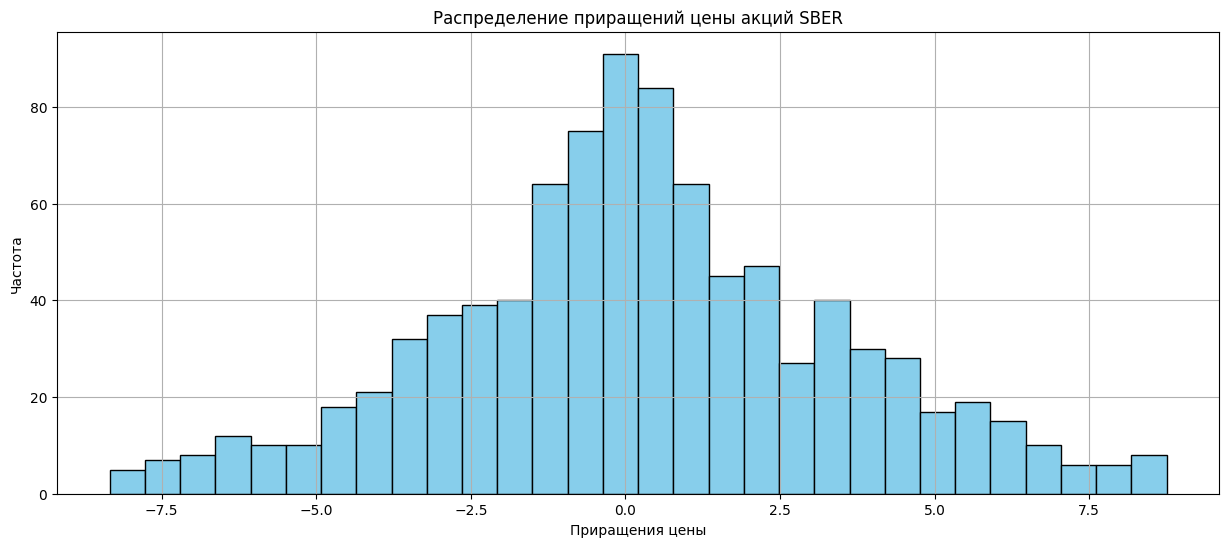

In [83]:
plt.subplots(figsize=(15, 6))
plt.hist(filtered_data['increments'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение приращений цены акций SBER')
plt.xlabel('Приращения цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Доверительный интервал для среднего приращений с доверительным уровнем 95.0%: (np.float64(0.04388910902125831), np.float64(0.4617720931645345))


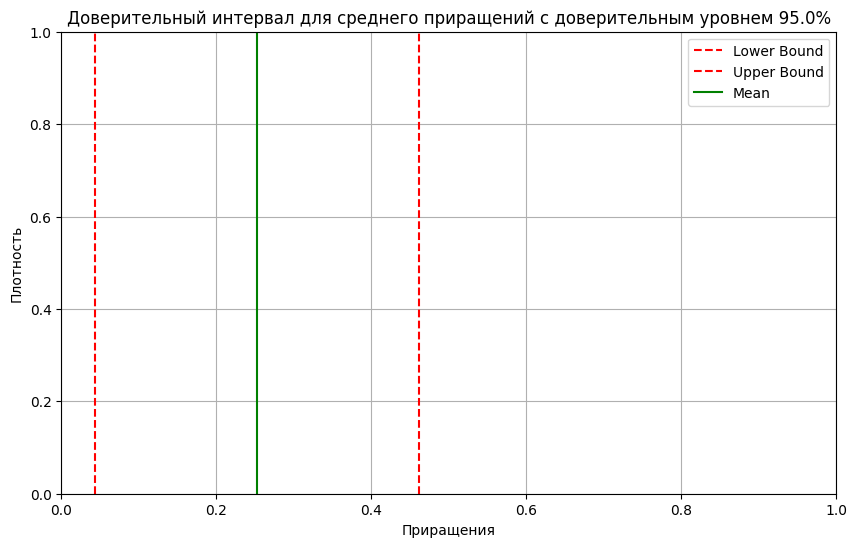

In [84]:

# Вычисление параметров нормального распределения
mean_increments = filtered_data['increments'].mean()
std_dev_increments = filtered_data['increments'].std()
n_samples = len(filtered_data['increments'])

# Уровень доверия
confidence_level = 0.95

# Доверительный интервал для среднего
z_value = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_value * (std_dev_increments / np.sqrt(n_samples))
confidence_interval = (mean_increments - margin_of_error, mean_increments + margin_of_error)

print(f"Доверительный интервал для среднего приращений с доверительным уровнем {confidence_level * 100}%: {confidence_interval}")

# Визуализация доверительного интервала
plt.figure(figsize=(10, 6))
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='Lower Bound')
plt.axvline(x=confidence_interval[1], color='red', linestyle='--', label='Upper Bound')
plt.axvline(x=mean_increments, color='green', linestyle='-', label='Mean')
plt.title(f'Доверительный интервал для среднего приращений с доверительным уровнем {confidence_level * 100}%')
plt.xlabel('Приращения')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()


# Проверка на Логнормальное распределение

p-value for the log-normal test: 2.8595142227607176e-28
Данные не являются логнормально распределенными.


/var/folders/3k/5p8p4n6n0ks6j1029qqcjckc0000gn/T/ipykernel_16981/398398639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['log_close'] = np.log(stock_data['close'])


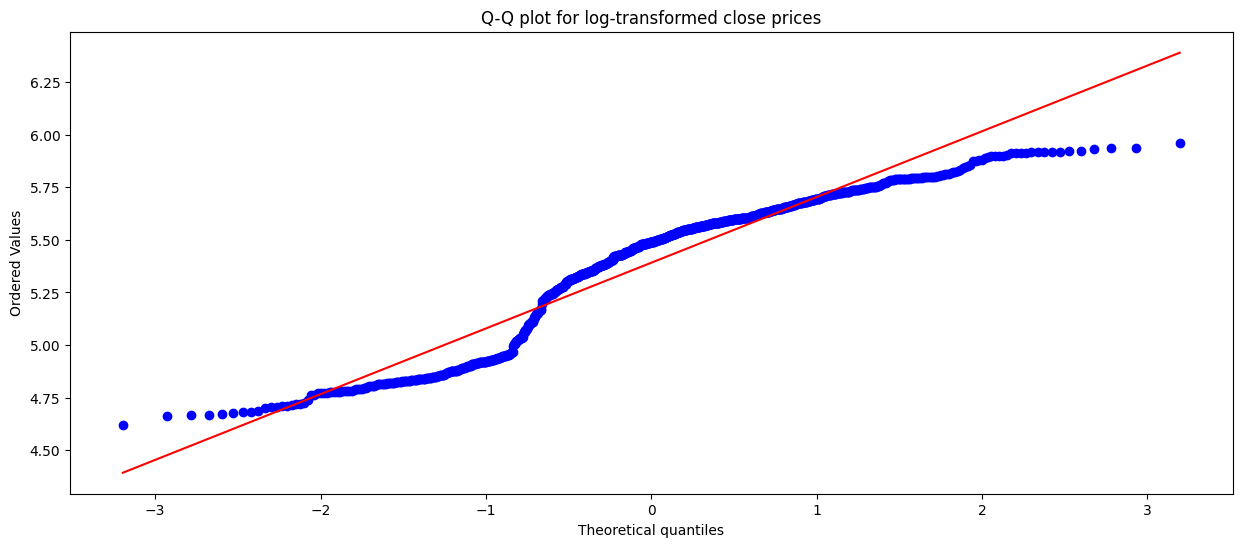

In [85]:
stock_data['log_close'] = np.log(stock_data['close'])


statistic, p_value = stats.normaltest(stock_data['log_close'])
print(f"p-value for the log-normal test: {p_value}")


if p_value > 0.05:
    print("Логнормальное распределение подтверждено.")
else:
    print("Данные не являются логнормально распределенными.")

plt.subplots(figsize=(15, 6))
stats.probplot(stock_data['log_close'], dist="norm", plot=plt)
plt.title("Q-Q plot for log-transformed close prices")
plt.show()

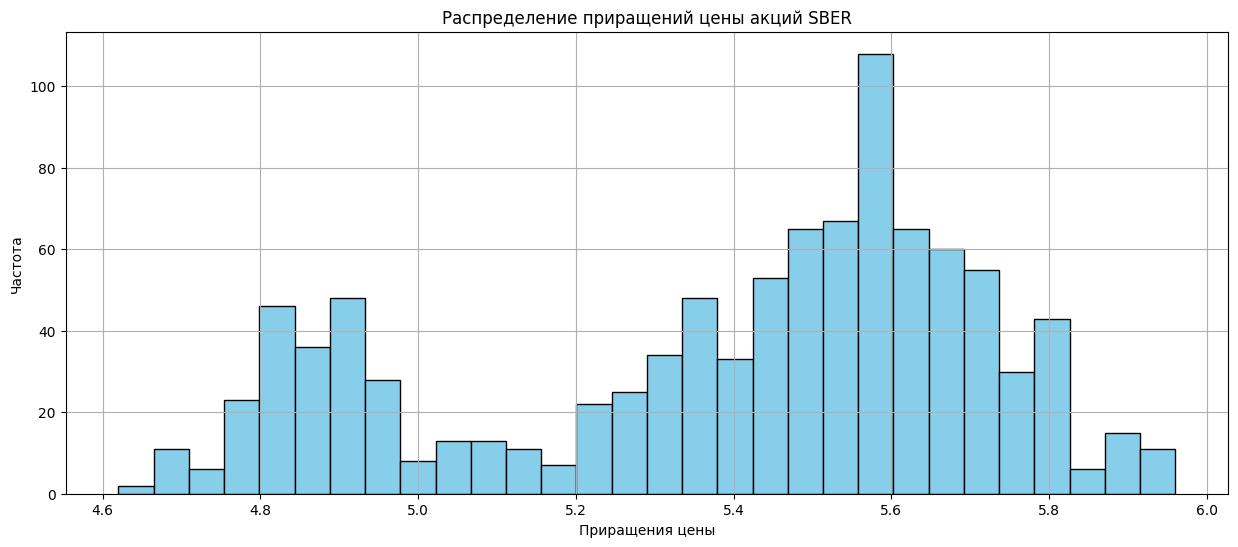

In [86]:
plt.subplots(figsize=(15, 6))
plt.hist(stock_data['log_close'], bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение приращений цены акций SBER')
plt.xlabel('Приращения цены')
plt.ylabel('Частота')
plt.grid(True)
plt.show()